In [11]:
%run constants.ipynb
import matplotlib.pyplot as plt

In [20]:
x_values = []
y_values = []
z_values = []
with open('n=4_coords', 'r') as file:
    for line in file:
        # Split each line by comma and convert to integers
        x, y, z = map(int, line.strip().split(','))
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

# Write the x and y values as two giant lines
with open('n=4_coordsb', 'w') as file:
    # Write x values on the first line
    file.write(','.join(map(str, x_values)) + '\n')
    
    # Write y values on the second line
    file.write(','.join(map(str, y_values)) + '\n')
    file.write(','.join(map(str, z_values)) + '\n')

In [22]:
def read(n):
    with open(f'n={n}_coords') as fp:
        lines = fp.readlines()
        xs = [int(i) for i in lines[0].strip().split(',')]
        ys = [int(i) for i in lines[1].strip().split(',')]
    return xs, ys

In [38]:
def subplot_f(n, ax=None):
    xs, ys = read(n)
    
    ax.scatter(xs, ys, color='red', zorder=5)
    ax.plot(xs, xs, linestyle='--', color='blue', label='x<y')  # x<y boundary
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'n={n}')
    
    ax.grid(visible=True)
#     ax.set_aspect('equal', adjustable='box')

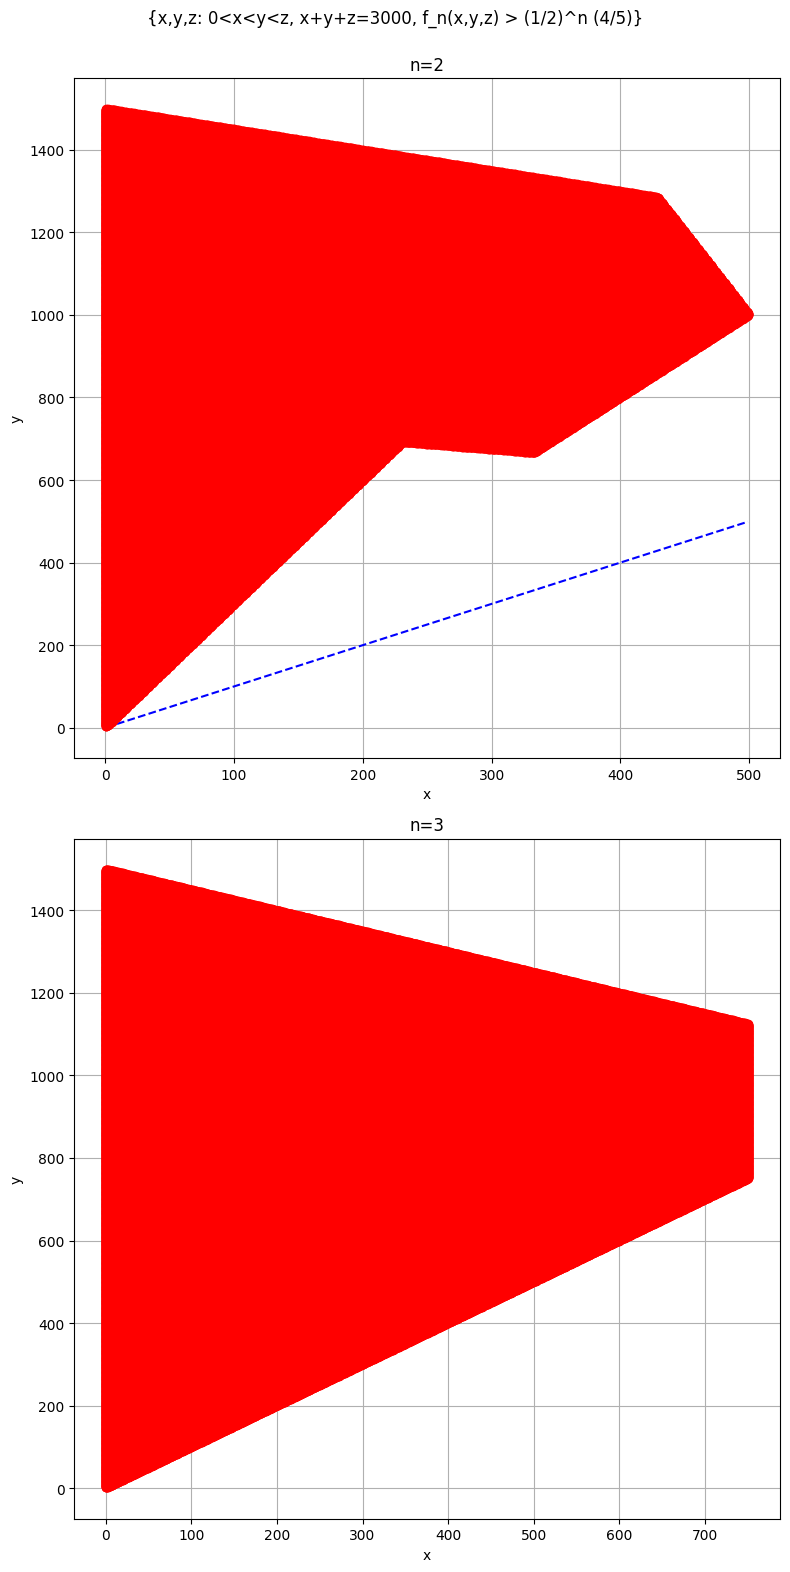

In [39]:
fig, axs = plt.subplots(2,1, figsize=(8,16))
subplot_f(2, ax=axs[0])
subplot_f(3, ax=axs[1])
# subplot_f(4, ax=axs[1])
plt.tight_layout(rect=[0, 0, 1, 0.96])

fig.suptitle('{x,y,z: 0<x<y<z, x+y+z=3000, f_n(x,y,z) > (1/2)^n (4/5)}')
plt.show()